# Getting the Lake Coordinates

In order to perform the analysis, the region of the coordinates of the waterbody is required. Please go to https://www.geojson.io to do that. Embedded is the video demonstrating an example.

One should notice to select not just the exact area of waterbody as per the map, but some extra region to cover the seasonal variations. 

Please remember that this algorithm is aimed at the Indian subcontinent. Hence choose the data points accordingly.

<video width="960" height="540" controls src="result.mp4" />


In the cell below insert the result from https://www.geojson.io

```
%%writefile lake.geojson

{
............

}
```

In [1]:
%%writefile lake.geojson


{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              76.1803150177002,
              15.00821498647137
            ],
            [
              76.15121841430664,
              14.996856988428606
            ],
            [
              76.14143371582031,
              14.968500814372751
            ],
            [
              76.15791320800781,
              14.963359819419823
            ],
            [
              76.15885734558105,
              14.969537290353294
            ],
            [
              76.16992950439453,
              14.980109058941233
            ],
            [
              76.19396209716797,
              14.991385036826626
            ],
            [
              76.19215965270996,
              15.005644981344407
            ],
            [
              76.1803150177002,
              15.00821498647137
            ]
          ]
        ]
      }
    }
  ]
}

Overwriting lake.geojson


# Import Libraries

In [2]:
import os
import boto3
import json
import numpy as np
import pandas as pd
import datetime
import satsearch
import rasterio as rio
from fitting import *
from lib_funcs import *


# Initiation

The AWS Session is inititated to access sentinel 2 data repository

In [3]:

os.environ['CURL_CA_BUNDLE'] = '/etc/ssl/certs/ca-certificates.crt'
os.environ['AWS_NO_SIGN_REQUEST'] = 'YES'

print("Creating AWS Session")
aws_session = rio.session.AWSSession(boto3.Session(), aws_unsigned=True)


json_file = 'lake.geojson'



Creating AWS Session


# Data Extraction
The next cell will start the processing of json file and get the NDMI data.
NDMI is calculated by

`NDMI = (B8A - B11)/(B8A + B11)`

The NDMI data will be calculated for each pixel of the data with 1 pixel amounting to 20m x 20m. Then the NDMI value is summed up for the whole region. The results will be saved in `lake_ndmi_stats.csv`.

This process might take a while depending on the internet connectivity and the machine's capabilities. 

In [4]:
get_results(aws_session, json_file)
# These results will be saved 

Results between 2017 Jan 1 and today ( 2022 Aug 29 ) found
Found  348 items


100%|██████████| 348/348 [19:42<00:00,  3.40s/it]


# Data cleaning
The next cell will clean the data from the calculation in the previous cell. If the place give is in Indian subcontinent there will be more data points in the summer (Jan-May) rather than the Monsoon season (Jun-Dec)

In [5]:

df = pd.read_csv('lake_ndmi_stats.csv')
df = df.reset_index(drop=True)
df_clean = clean_data(df)


Number of data points per month over the years
1  Month  Jan  : 21
2  Month  Feb  : 26
3  Month  Mar  : 28
4  Month  Apr  : 27
5  Month  May  : 21
6  Month  Jun  : 4
7  Month  Jul  : 2
8  Month  Aug  : 1
9  Month  Sep  : 8
10  Month  Oct  : 12
11  Month  Nov  : 12
12  Month  Dec  : 20
It can be seen that in the second half of the year there are less data points comparatively due to monsoon clouds


# Trend Analysis

Here we can see the behaviour of NDMI sum over the years. If the region follows regular pattern, it should show linear behaviour. Then we can predict how the summer in the region will be

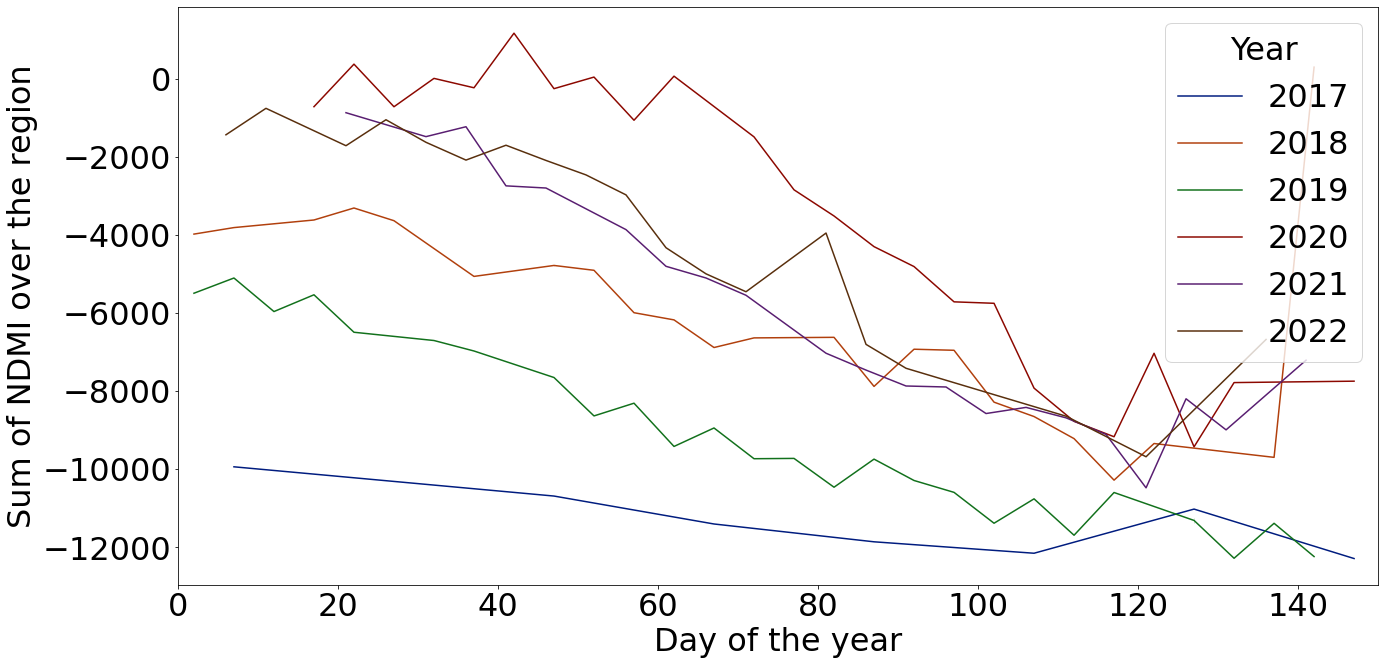

In [6]:
get_summer_trends(df_clean)

# Fitting

The next cell demonstrates how good of a linear fitting we can obtain for each year.
The lower the slope, the more intense the summer.

Year  2017 - 2018
Slope:  [-43.47046901]  ; Intercept:  32021913.35838937
Year  2018 - 2019
Slope:  [-50.72125914]  ; Intercept:  37379303.5462488
Year  2019 - 2020
Slope:  [-71.26079152]  ; Intercept:  52551192.34751397
Year  2020 - 2021
Slope:  [-60.96546566]  ; Intercept:  44978706.04545194
Year  2021 - 2022
Slope:  [-59.76859092]  ; Intercept:  44117790.54573816
Year  2022 - 2023
Not enough data points


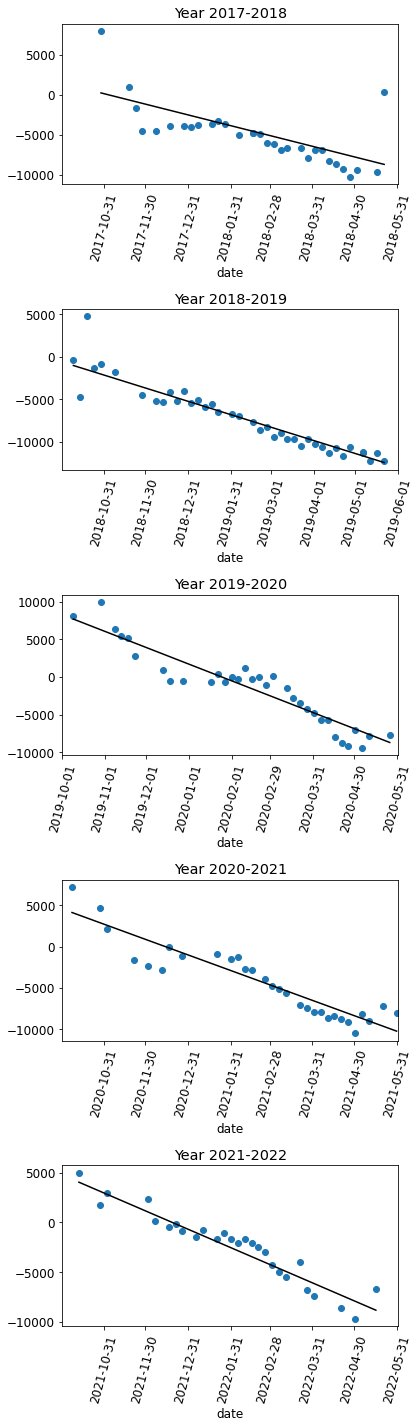

In [7]:
do_yearly_fitting(df_clean)

# Extremities

In the next cell, we demonstrate when the region is at its driest and wettest. This will give the end user a benchmark to compare.

1  item(s) found
1  item(s) found


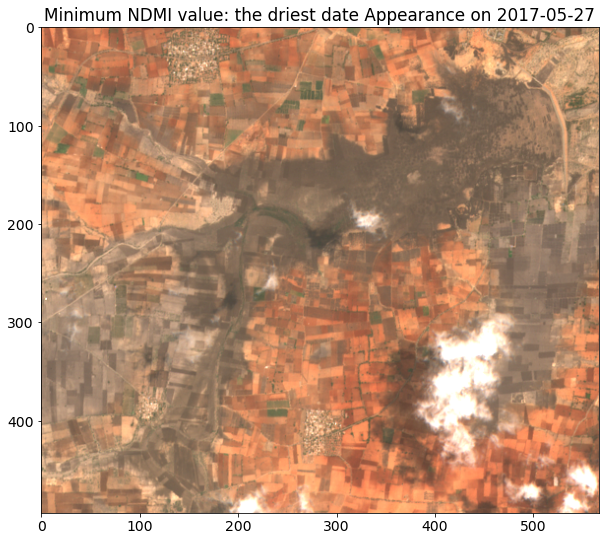

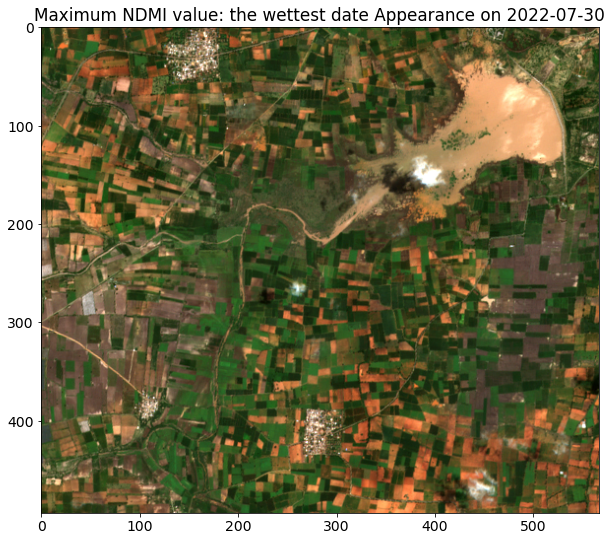

In [8]:
get_minmax(aws_session, df_clean, json_file)

# Prediction

We are not demonstrating the prediction for summer next year as we don't have enough data points. We would need at least 10 data points to make a reasonable estimate which would require data from October to February usually.


However, we demonstrate that given a predicted NDMI (for a given day) sum how the region could look based on historical benchmarks. 

1  item(s) found


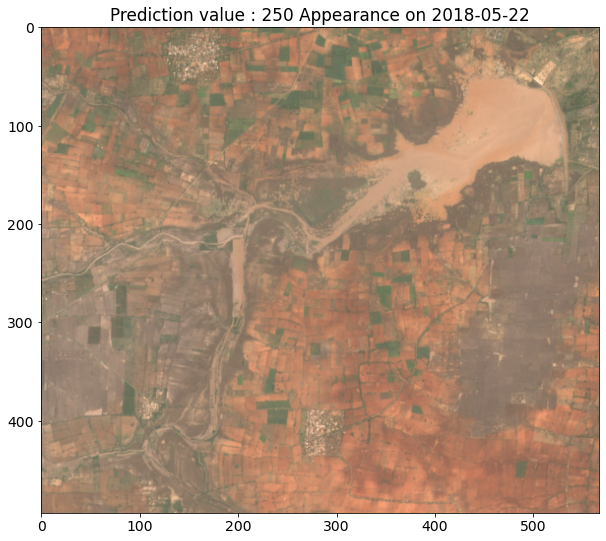

In [9]:
ndmi_pred_value = 250

get_similar(aws_session, ndmi_pred_value, df_clean, json_file)